<a href="https://colab.research.google.com/github/ethan-ac/penguin_counter_ece471/blob/main/mask_rcnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and setup for printing images

In [ ]:
#!sudo rm -rf penguin_counter_ece471/

Tutorials for implementing Mask R-CNN with Python/cv2

https://www.geeksforgeeks.org/image-segmentation-with-mask-r-cnn-grabcut-and-opencv/

https://github.com/spmallick/learnopencv/tree/master/Mask-RCNN

Other tutorials

https://github.com/QaisarRajput/mask-rcnn-opencv/tree/master

Bad tutorials

https://learnopencv.com/deep-learning-based-object-detection-and-instance-segmentation-using-mask-rcnn-in-opencv-python-c/

https://pyimagesearch.com/2018/11/19/mask-r-cnn-with-opencv/

https://pysource.com/2021/05/18/instance-segmentation-mask-r-cnn-with-python-and-opencv/

In [ ]:
!git clone https://github.com/ethan-ac/penguin_counter_ece471.git

Cloning into 'penguin_counter_ece471'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 114 (delta 2), reused 24 (delta 2), pack-reused 86
Receiving objects: 100% (114/114), 82.39 MiB | 16.20 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (49/49), done.


In [ ]:
import os
import sys
import skimage.io
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
%matplotlib inline
import tensorflow as tf

# Root directory of the project
ROOT_DIR = "penguin_counter_ece471"

# Import maskrcnn (mrcnn folder) as module
sys.path.append(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

In [ ]:
# For importing coco folder as module
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
import coco

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Loading the model configuration
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

... done downloading pretrained model!

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE

In [ ]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

tf.keras.Model.load_weights(model.keras_model, COCO_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead


In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

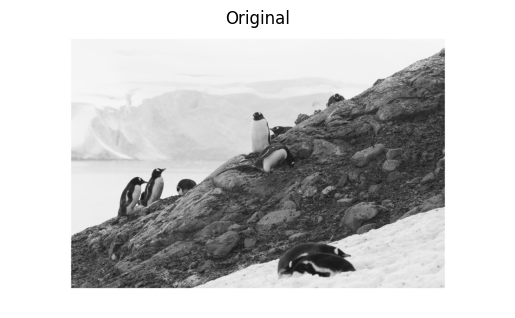

Processing 1 images
image                    shape: (1358, 2441, 3)       min:    9.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 2441.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


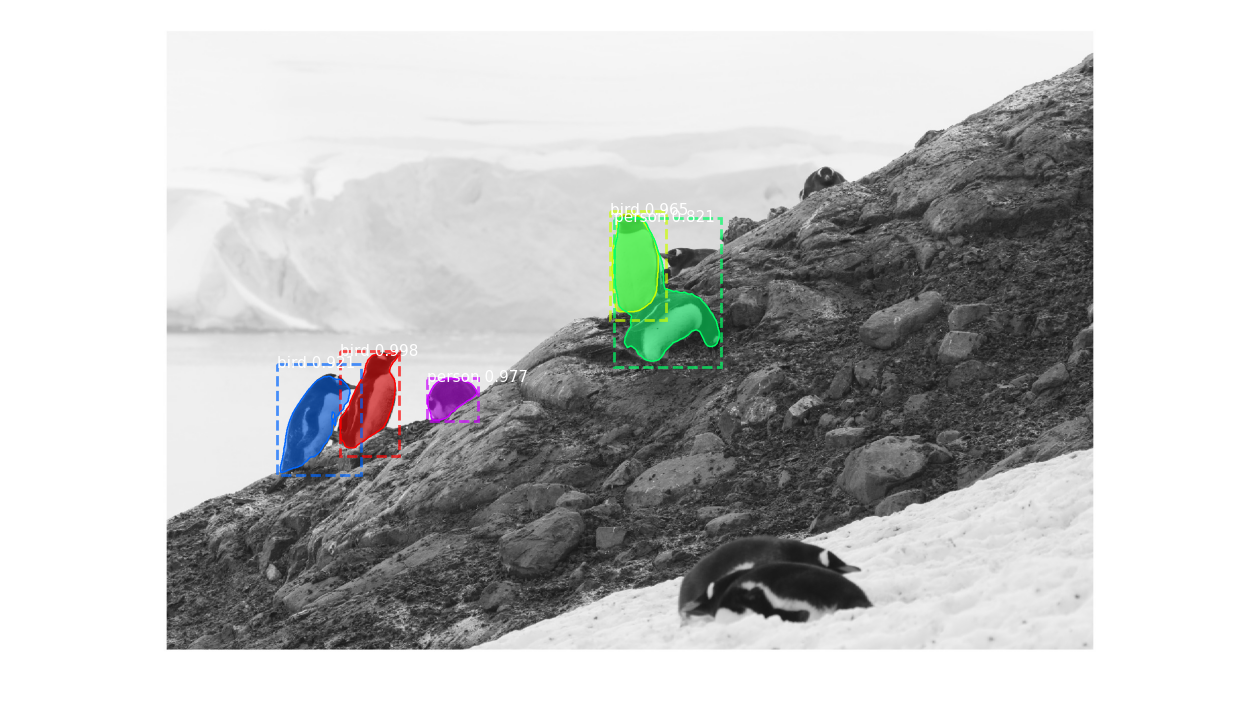

In [ ]:
IMAGE_DIR = os.path.join(ROOT_DIR, 'images/')
# Load a random image from the images folder
#file_names = next(os.walk(IMAGE_DIR))[2]
#image = skimage.io.imread(os.path.join(IMAGE_DIR, np.random.choice(file_names)))
image_name = 'penguins_3_greyscale.jpg'
image = skimage.io.imread(os.path.join(IMAGE_DIR, image_name))
plt.imshow(image)
plt.title('Original')
plt.axis('off')
plt.show()

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])

In [ ]:
# For converting roi coordinates generated using Mask R-CNN
# to (x1, y1, width, height)
def convertCoords(coords):
  # Input : (y1, x1, y2, x2)
  y1, x1, y2, x2 = coords
  width,height = x2 - x1, y2 - y1
  return (x1, y1, width, height)

# Extracting masks and rois from the result
def separateEntities(r):
  masks = [r['masks'][:,:,i].astype("uint8") for i in range(len(r['class_ids']))]
  rects = [(convertCoords(roi)) for roi in r['rois']]
  return masks,rects

# Generate masks
masks, rects = separateEntities(r)

print('Number of penguins found:', len(masks))

Number of penguins found: 5
